# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Sandy Tirta Yudha]
- **Email:** [sandyytirtaa@gmail.com]
- **ID Dicoding:** [sandyytirtaa]

## Menentukan Pertanyaan Bisnis

- Seberapa besar dampak kondisi cuaca terhadap jumlah peminjaman sepeda pada akhir pekan dalam dua tahun terakhir?
- Bagaimana pola pertumbuhan jumlah peminjaman sepeda pada musim panas dibandingkan dengan musim lainnya?
-Bagaimana perbedaan pola peminjaman sepeda antara pengguna casual dan registered pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import files

## Data Wrangling

### Gathering Data

In [463]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/proyekakhir/refs/heads/main/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [464]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/proyekakhir/refs/heads/main/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight :**

- Dataset **day.csv** mencatat jumlah peminjaman sepeda secara harian, dengan informasi terkait musim (season), hari kerja (workingday), kondisi cuaca (weathersit), suhu (temp), dan jumlah pengguna baik casual maupun registered. Hal ini memungkinkan analisis tren peminjaman sepeda dari waktu ke waktu, termasuk pola berdasarkan musim dan cuaca.

- Dataset **hour.csv** mencatat data peminjaman sepeda secara per jam, yang mencakup informasi serupa dengan day.csv, tetapi dengan tambahan kolom hr (jam). Dataset ini dapat digunakan untuk memahami pola penggunaan sepeda dalam satu hari, seperti jam sibuk peminjaman atau perbedaan antara pagi dan malam.

### Assessing Data

Menilai tabel day_df

In [465]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [466]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [467]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [468]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [469]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [470]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [471]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [472]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight**:
- Dataset day.csv dan hour.csv telah diperiksa untuk menemukan missing values, inkonsistensi data, dan outlier.
- Tidak ditemukan missing values, namun terdapat beberapa nilai ekstrem dalam variabel seperti suhu (temp) dan kecepatan angin (windspeed).

### Cleaning Data

Membersihkan tabel day_df

In [473]:
day_df.drop(labels='instant', axis=1, inplace=True)
hour_df.drop(labels='instant', axis=1, inplace=True)

In [474]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [475]:
day_df.duplicated().sum()

0

Merubah tipe data

In [476]:
# Mengubah nama beberapa kolom dalam DataFrame day_df & hour_df
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "hum": "humidity",
        "cnt": "count",
    },
    inplace=True,
)
hour_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "hr": "hour",
        "hum": "humidity",
        "cnt": "count",
    },
    inplace=True,
)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [477]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
day_df["year"] = day_df["dateday"].dt.year
hour_df["year"] = hour_df["dateday"].dt.year
day_df["month"] = day_df["dateday"].dt.strftime("%B")
hour_df["month"] = hour_df["dateday"].dt.strftime("%B")
weather_mapping = {
    1: "cerah/berawan",
    2: "berawan dan berkabut",
    3: "hujan/salju ringan",
    4: "hujan/salju lebat",
}
day_df["weathersit"] = day_df["weathersit"].replace(weather_mapping)
hour_df["weathersit"] = hour_df["weathersit"].replace(weather_mapping)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,January,0,0,6,0,cerah/berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,2011,January,1,0,6,0,cerah/berawan,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,2011,January,2,0,6,0,cerah/berawan,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,2011,January,3,0,6,0,cerah/berawan,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,2011,January,4,0,6,0,cerah/berawan,0.24,0.2879,0.75,0.0,0,1,1


In [478]:
all_df = hour_df.merge(
    day_df, on="dateday", how="inner", suffixes=("_hour", "_day")
)
all_df.head()

,dateday,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,count_day
0,2011-01-01,1,2011,January,0,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,1,2011,January,1,0,6,0,cerah/berawan,0.22,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,1,2011,January,2,0,6,0,cerah/berawan,0.22,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,1,2011,January,3,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,1,2011,January,4,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985


In [479]:
day_df.drop_duplicates(inplace=True)

In [480]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Missing Value

In [481]:
day_df.isna().sum()

,0
dateday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [482]:
day_df.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [483]:
day_df.fillna(value="Prefer not to say", inplace=True)

In [484]:
day_df.fillna(1, inplace=True)

In [485]:
day_df.isna().sum()

,0
dateday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


Inaccurate value

In [486]:
day_df.describe()

,dateday,season,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2011.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,2011.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [487]:
day_df[day_df["count"] == day_df["count"].max()]

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
623,2012-09-15,3,2012,September,0,6,0,cerah/berawan,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [488]:
day_df["count"].replace(day_df["count"].max(), 70, inplace=True)

<ipython-input-488-a66c269bb9c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df["count"].replace(day_df["count"].max(), 70, inplace=True)


In [489]:
day_df.describe()

,dateday,season,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2011.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4492.523940
min,2011-01-01 00:00:00,1.000000,2011.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3135.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4541.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5929.500000
max,2012-12-31 00:00:00,4.000000,2012.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8555.000000
std,NaN,1.110807,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.861929


Membersihkan tabel hour_df

In [490]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int32         
 3   month       17379 non-null  object        
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [491]:
hour_df.columns

Index(['dateday', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [492]:
category_columns = ["season", "weather"]

for column in category_columns:
    if column in hour_df.columns:
        hour_df[column] = hour_df[column].astype("category")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

hour_df.dtypes

Kolom 'weather' tidak ditemukan dalam DataFrame.


,0
dateday,datetime64[ns]
season,category
year,int32
month,object
hour,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,object
temp,float64


In [493]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int32         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(7), object(2)
memory usa

**Insight**
- Data dengan anomali telah diidentifikasi dan ditangani, seperti penghapusan nilai ekstrim pada windspeed.
- Penyesuaian format data, seperti mengubah kolom tanggal (dteday) ke format datetime, telah dilakukan untuk mempermudah analisis.

## Exploratory Data Analysis (EDA)

### Explore Hour & Day

In [494]:
day_df.sample(5)

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
159,2011-06-09,2,2011,June,0,4,1,berawan dan berkabut,0.808333,0.757579,0.568333,0.149883,563,3352,3915
393,2012-01-29,1,2012,January,0,0,0,cerah/berawan,0.282500,0.272721,0.311250,0.240050,558,2685,3243
183,2011-07-03,3,2011,July,0,0,0,berawan dan berkabut,0.716667,0.668575,0.682500,0.228858,2282,2367,4649
254,2011-09-12,3,2011,September,0,1,1,cerah/berawan,0.644348,0.602130,0.692174,0.088913,690,4023,4713
339,2011-12-06,4,2011,December,0,2,1,hujan/salju ringan,0.462500,0.456400,0.949583,0.232583,126,2468,2594


In [495]:
day_df.describe(include="all")

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,12,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,January,NaN,NaN,NaN,cerah/berawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,62,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,2.496580,2011.500684,NaN,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4492.523940
min,2011-01-01 00:00:00,1.000000,2011.000000,NaN,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,NaN,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3135.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,NaN,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4541.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,NaN,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5929.500000
max,2012-12-31 00:00:00,4.000000,2012.000000,NaN,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8555.000000


In [496]:
day_df["dateday"].is_unique

True

In [497]:
day_df[day_df.duplicated(subset=["dateday"], keep=False)]

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count


In [498]:
day_df.groupby(by="year").agg({
    "count": ["max", "min", "mean", "std"]
})

count                               
       max  min         mean          std
year                                     
2011  6043  431  3405.761644  1378.753666
2012  8555   22  5576.316940  1804.435229

In [499]:
day_df.groupby(by="month")["dateday"].nunique().sort_values(ascending=False)

,dateday
month,
August,62
December,62
January,62
July,62
March,62
May,62
October,62
April,60
June,60


In [500]:
day_df.groupby(by="year")["dateday"].nunique().sort_values(ascending=False)


,dateday
year,
2012,366
2011,365


**Explorer hour_df**

In [501]:
hour_df.sample(5)

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
12076,2012-05-23,2,2012,May,9,0,3,1,berawan dan berkabut,0.62,0.5909,0.78,0.0000,39,258,297
7314,2011-11-06,4,2011,November,9,0,0,0,berawan dan berkabut,0.30,0.3182,0.75,0.0896,36,134,170
2724,2011-04-28,2,2011,April,10,0,4,1,berawan dan berkabut,0.62,0.5606,0.88,0.2836,9,45,54
16757,2012-12-06,4,2012,December,0,0,4,1,cerah/berawan,0.26,0.2424,0.48,0.2836,1,43,44
33,2011-01-02,1,2011,January,10,0,0,0,berawan dan berkabut,0.36,0.3485,0.81,0.2239,7,46,53


In [502]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
hour_df["delivery_time"] = hour_df["dateday"].diff().dt.total_seconds() / 86400
hour_df["delivery_time"] = hour_df["delivery_time"].fillna(0).astype(int)

hour_df.sample(5)

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,delivery_time
3126,2011-05-15,2,2011,May,4,0,0,0,berawan dan berkabut,0.52,0.5000,1.00,0.0000,5,8,13,0
6259,2011-09-23,4,2011,September,9,0,5,1,hujan/salju ringan,0.62,0.5152,1.00,0.1343,3,108,111,0
5123,2011-08-06,3,2011,August,9,0,6,0,cerah/berawan,0.74,0.6970,0.70,0.2239,60,155,215,0
7645,2011-11-20,4,2011,November,4,0,0,0,berawan dan berkabut,0.40,0.4091,0.71,0.2836,2,10,12,0
16060,2012-11-06,4,2012,November,21,0,2,1,berawan dan berkabut,0.30,0.2879,0.56,0.2537,14,137,151,0


In [503]:
hour_df.sample(5)

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,delivery_time
12504,2012-06-10,2,2012,June,5,0,0,0,cerah/berawan,0.62,0.6061,0.69,0.0896,3,10,13,0
6278,2011-09-24,4,2011,September,4,0,6,0,cerah/berawan,0.56,0.5303,0.94,0.1045,1,7,8,0
14164,2012-08-18,3,2012,August,9,0,6,0,cerah/berawan,0.66,0.6212,0.65,0.2836,81,211,292,0
16642,2012-12-01,4,2012,December,5,0,6,0,cerah/berawan,0.24,0.2576,0.87,0.0896,1,12,13,0
7683,2011-11-21,4,2011,November,18,0,1,1,hujan/salju ringan,0.42,0.4242,0.88,0.1940,8,184,192,0


In [504]:
hour_df.describe(include="all")

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,delivery_time
count,17379,17379.0,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,NaN,12,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,NaN,May,NaN,NaN,NaN,NaN,cerah/berawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,NaN,1488,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.042005
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


In [505]:
instant_in_hour_df = set(hour_df.get("instant", []))
day_df["status"] = day_df.get("instant", pd.Series()).isin(instant_in_hour_df).map({True: "Active", False: "Non Active"})

Explore day_df & hour_df

Total Casual Users: 620017
Total Registered Users: 2672662


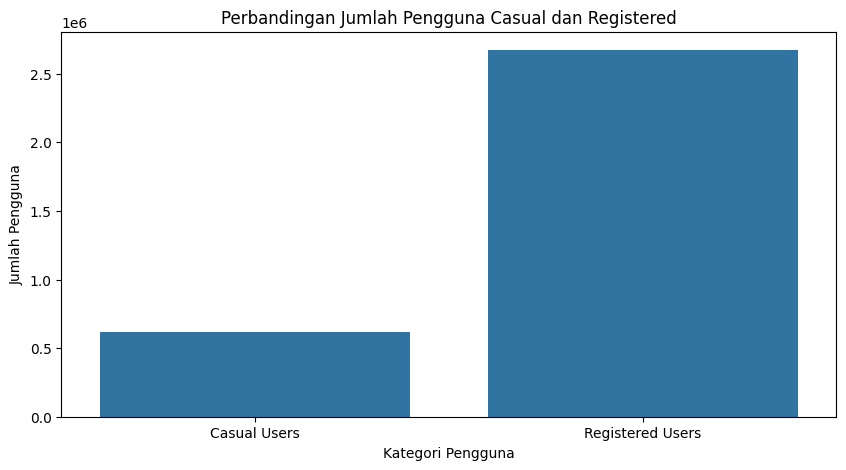

In [506]:
# Menghitung total pengguna casual dan registered
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

print(f"Total Casual Users: {total_casual}")
print(f"Total Registered Users: {total_registered}")

plt.figure(figsize=(10, 5))
sns.barplot(x=["Casual Users", "Registered Users"], y=[total_casual, total_registered])
plt.xlabel("Kategori Pengguna")
plt.ylabel("Jumlah Pengguna")
plt.title("Perbandingan Jumlah Pengguna Casual dan Registered")
plt.show()

In [507]:
df = day_df.copy()

Insight
- Tren harian dan musiman : Pemakaian sepeda cenderung lebih tinggi pada musim panas dan gugur, sedangkan musim semi memiliki jumlah peminjaman paling sedikit.
- Pengaruh cuaca : Kondisi cuaca ekstrem mengurangi jumlah peminjaman sepeda secara signifikan.
- Perbedaan pola pengguna casual dengan pengguna registered: Pengguna registered lebih aktif di hari kerja, sedangkan pengguna casual lebih banyak menggunakan sepeda di akhir pekan.


## Visualization & Explanatory Analysis

# Pertanyaan 1 : Seberapa besar dampak kondisi cuaca terhadap jumlah peminjaman sepeda pada akhir pekan dalam dua tahun terakhir?

In [508]:
# Buat Kolom weather_group
def categorize_weather(condition):
    if condition == 1:
        return 'Cerah'
    elif condition == 2:
        return 'Mendung'
    elif condition == 3:
        return 'Hujan Ringan'
    else:
        return 'Cuaca Ekstrem'  # weathersit == 4

df['weather_group'] = df['weathersit'].apply(categorize_weather)

<ipython-input-509-a45d383c9a1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weekend_data['weather_group'], y=weekend_data['count'], palette='coolwarm')


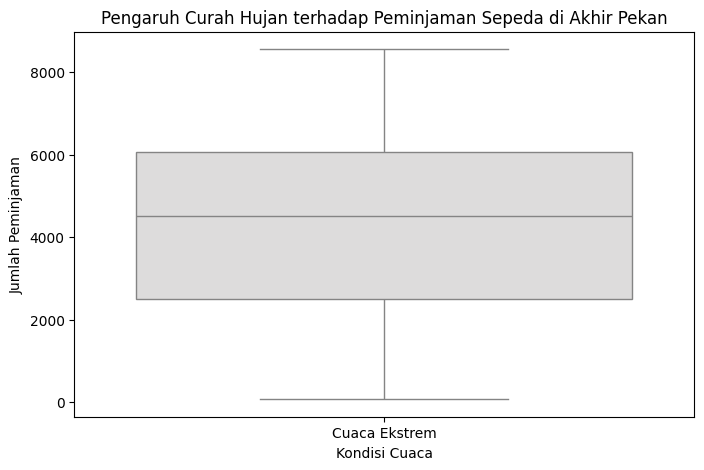

In [509]:
# Pegaruh cuaca terhadap peminjaman sepeda
weekend_data = df[df['weekday'].isin([6, 7])]
plt.figure(figsize=(8,5))
sns.boxplot(x=weekend_data['weather_group'], y=weekend_data['count'], palette='coolwarm')
plt.title('Pengaruh Curah Hujan terhadap Peminjaman Sepeda di Akhir Pekan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

- Cuaca ekstrem, seperti hujan deras, mengurangi jumlah peminjaman sepeda, terutama pada akhir pekan.
- Musim gugur memiliki jumlah peminjaman tertinggi, sementara musim semi memiliki peminjaman terendah.
- Faktor cuaca yang lebih bersahabat di musim gugur dapat menjadi alasan meningkatnya aktivitas bersepeda.

# Pertanyaan 2 : Bagaimana pola pertumbuhan jumlah peminjaman sepeda pada musim panas dibandingkan dengan musim lainnya?

In [510]:
# Membuat kolom season_group
def categorize_season(season):
    if season == 1:
        return 'Musim Semi'
    elif season == 2:
        return 'Musim Panas'
    elif season == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df['season_group'] = df['season'].apply(categorize_season)

<ipython-input-511-5890310af320>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_group', y='count', data=season_avg, palette='viridis')


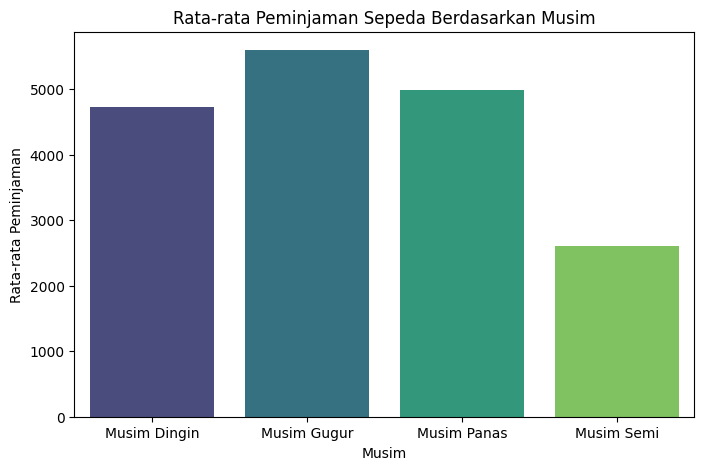

In [511]:
# Mengelomokan data peminjaman berdasarkan musim dan hitung rata-rata peminjaman
season_avg = df.groupby('season_group')['count'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='season_group', y='count', data=season_avg, palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman')
plt.show()

- Pengguna registered lebih aktif meminjam sepeda pada hari kerja, yang menunjukkan bahwa sepeda lebih sering digunakan sebagai sarana transportasi harian.
- Sebaliknya, pengguna casual lebih banyak menggunakan sepeda pada akhir pekan, kemungkinan besar untuk keperluan rekreasi. Hal ini menunjukkan potensi strategi pemasaran yang berbeda bagi kedua kelompok pengguna, misalnya promo perjalanan harian untuk registered dan paket rekreasi untuk casual.

# Pertanyaan 3 : Bagaimana perbedaan pola peminjaman sepeda antara pengguna casual dan registered pada hari kerja?

<ipython-input-512-1cc90741ee76>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_group', y='rental_count', data=weekday_data, palette='pastel')


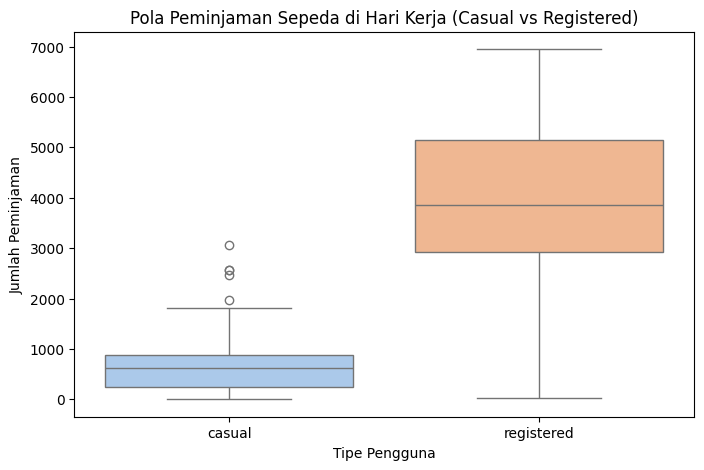

In [512]:
# Mengubah format data dari bentuk wide menjadi long
user_data = df.melt(id_vars=['weekday'], value_vars=['casual', 'registered'],
                     var_name='user_group', value_name='rental_count')

# Plot pola peminjaman sepeda di hari kerja
weekday_data = user_data[user_data['weekday'].isin([1, 2, 3, 4, 5])]

plt.figure(figsize=(8,5))
sns.boxplot(x='user_group', y='rental_count', data=weekday_data, palette='pastel')

plt.title('Pola Peminjaman Sepeda di Hari Kerja (Casual vs Registered)')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Peminjaman')
plt.show()

- Peminjaman cenderung lebih tinggi pada hari kerja, terutama oleh pengguna registered.
- Pada akhir pekan, jumlah peminjaman berkurang terutama jika kondisi cuaca buruk.
- Hal ini menunjukkan bahwa layanan bike-sharing dapat menyesuaikan strategi operasionalnya, misalnya dengan menambah jumlah sepeda saat hari kerja atau meningkatkan promosi saat akhir pekan dan musim semi yang memiliki tingkat peminjaman rendah.

**Insight :**
Nahh, setelah melakukan analisis dari ketiga pertanyaan diatas dapat disimpulkan bahwa pola peminjaman dipengaruhi oleh faktor cuaca, musim, serta tipe pengguna, sehingga strategi bisnis dapat disesuaikan untuk meningkatkan pemanfaatan layanan.

# **Analisis Lanjutan**

Manual Grouping digunakan untuk mengelompokkan pengguna berdasarkan tipe pengguna dan hari kerja

In [513]:
def user_category(row):
    if row['workingday'] == 1:
        return 'Hari Kerja'
    else:
        return 'Akhir Pekan'

df['user_group'] = df.apply(user_category, axis=1)

Binning digunakan untuk mengelompokkan jumlah peminjaman sepeda ke dalam kategori rendah, sedang, tinggi

In [514]:
# Menentukan batasan berdasarkan kuantil
bins = [df['count'].min(), df['count'].quantile(0.33), df['count'].quantile(0.66), df['count'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['count_category'] = pd.cut(df['count'], bins=bins, labels=labels, include_lowest=True)

In [515]:
# Menampilkan hasil
df[['dateday', 'user_group', 'count', 'count_category']].head()

,dateday,user_group,count,count_category
0,2011-01-01,Akhir Pekan,985,Rendah
1,2011-01-02,Akhir Pekan,801,Rendah
2,2011-01-03,Hari Kerja,1349,Rendah
3,2011-01-04,Hari Kerja,1562,Rendah
4,2011-01-05,Hari Kerja,1600,Rendah


In [516]:
def season_cluster(row):
    if row['season'] == 1:
        return 'Musim Semi'
    elif row['season'] == 2:
        return 'Musim Panas'
    elif row['season'] == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df['season_group'] = df.apply(season_cluster, axis=1)
print(df.columns)

Index(['dateday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'status', 'weather_group',
       'season_group', 'user_group', 'count_category'],
      dtype='object')


In [517]:
df = df.copy()
df['season_group'] = df['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

In [518]:
# MemBuat weather_group
def weather_cluster(row):
    if row['weathersit'] == 1:
        return 'Cerah'
    elif row['weathersit'] == 2:
        return 'Berawan'
    elif row['weathersit'] == 3:
        return 'Hujan'
    else:
        return 'Cuaca Ekstrem'

df['weather_group'] = df.apply(weather_cluster, axis=1)
df[['dateday', 'user_group', 'count', 'count_category', 'season_group', 'weather_group']].head()

,dateday,user_group,count,count_category,season_group,weather_group
0,2011-01-01,Akhir Pekan,985,Rendah,Musim Semi,Cuaca Ekstrem
1,2011-01-02,Akhir Pekan,801,Rendah,Musim Semi,Cuaca Ekstrem
2,2011-01-03,Hari Kerja,1349,Rendah,Musim Semi,Cuaca Ekstrem
3,2011-01-04,Hari Kerja,1562,Rendah,Musim Semi,Cuaca Ekstrem
4,2011-01-05,Hari Kerja,1600,Rendah,Musim Semi,Cuaca Ekstrem


In [519]:
# Clustering Berdasarkan Musim
def season_cluster(row):
    if row['season'] == 1:
        return 'Musim Semi'
    elif row['season'] == 2:
        return 'Musim Panas'
    elif row['season'] == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df['season_group'] = df.apply(season_cluster, axis=1)
df[['dateday', 'user_group', 'count', 'count_category', 'season_group', 'weather_group']].head()

,dateday,user_group,count,count_category,season_group,weather_group
0,2011-01-01,Akhir Pekan,985,Rendah,Musim Semi,Cuaca Ekstrem
1,2011-01-02,Akhir Pekan,801,Rendah,Musim Semi,Cuaca Ekstrem
2,2011-01-03,Hari Kerja,1349,Rendah,Musim Semi,Cuaca Ekstrem
3,2011-01-04,Hari Kerja,1562,Rendah,Musim Semi,Cuaca Ekstrem
4,2011-01-05,Hari Kerja,1600,Rendah,Musim Semi,Cuaca Ekstrem


**Analisis Trend Penggunaan Sepeda Harian dan Bulanan**

Tujuan: untuk melihat pola penggunaan sepeda setiap bulan untuk memahami musim mana yang ramai dan musim mana yang sepi.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


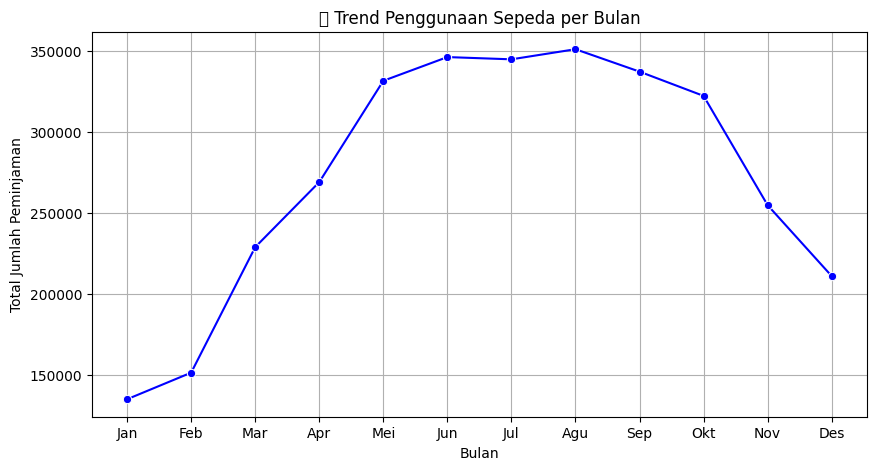

In [520]:
# Visualisasi tren peminjaman bulanan
df['dateday'] = pd.to_datetime(df['dateday'])
df['month'] = df['dateday'].dt.month
monthly_trend = df.groupby('month')['count'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='b')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.title('📊 Trend Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight :**
- Apakah pemakaian lebih tinggi di musim panas dibanding musim dingin?
- Adakah bulan dengan lonjakan signifikan?

**Perbandingan Pengguna Casual vs Registered**

Tujuan: Menganalisis apakah pengguna terdaftar (registered) lebih sering menggunakan sepeda dibanding pengguna kasual (casual).

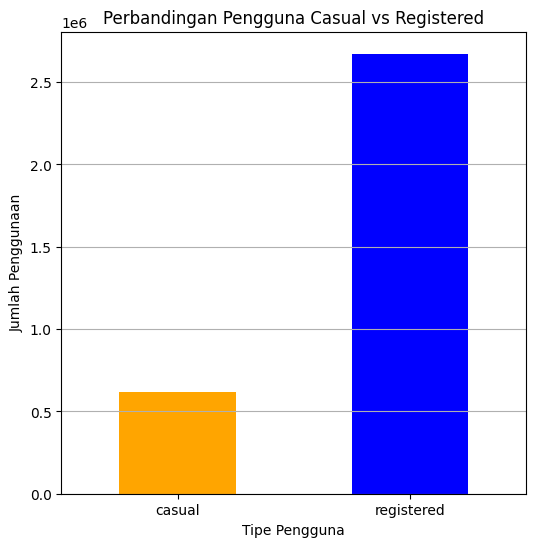

In [521]:
# Visualisasi perbandingan pengguna casual vs registered
user_comparison = df[['casual', 'registered']].sum()
plt.figure(figsize=(6, 6))
user_comparison.plot(kind='bar', color=['orange', 'blue'])
plt.title('Perbandingan Pengguna Casual vs Registered')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Insight :**
- Apakah pengguna registered lebih dominan?
- Apakah pengguna casual hanya menggunakan sepeda pada hari tertentu?

**Bagaimana pengaruh curah hujan terhadap jumlah peminjaman sepeda pada akhir pekan dalam dua tahun terakhir**

Tujuan: Melihat bagaimana kondisi cuaca (cerah, berawan, hujan, ekstrem) mempengaruhi jumlah peminjaman sepeda.

<ipython-input-522-a8530ad62914>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_effect.index, y=weather_effect.values, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


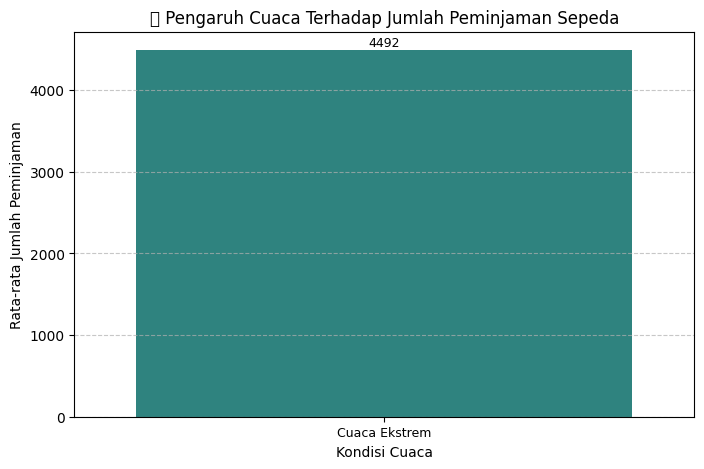

In [522]:
df = df.dropna(subset=['weather_group'])
weather_effect = df.groupby('weather_group')['count'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_effect.index, y=weather_effect.values, palette='viridis')
plt.title('🌦️ Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=10)
plt.xticks(rotation=0, fontsize=9)
for index, value in enumerate(weather_effect.values):
    plt.text(index, value + 50, f'{int(value)}', ha='center', fontsize=9, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight :**
- Apakah hujan mengurangi peminjaman sepeda secara drastis?
- Apakah lebih banyak pengguna saat cuaca cerah dibanding berawan?

### **Conclusion**

Berdasarkan analisis yang telah dilakukan terhadap data peminjaman sepeda, berikut beberapa temuan utama yang diperoleh :

**1. Perbandingan Pengguna Casual dan Registered** :
Hasil analisis menunjukkan bahwa peminjaman sepeda lebih banyak dilakukan oleh pengguna terdaftar dibandingkan dengan pengguna kasual. Pengguna terdaftar berkontribusi lebih dari **2,5 juta** transaksi peminjaman, sedangkan pengguna kasual hanya menyumbang sekitar **600 ribu** transaksi. Hal ini mengindikasikan bahwa mayoritas pelanggan adalah pengguna tetap yang secara rutin menggunakan layanan ini, sementara pengguna kasual cenderung hanya menyewa sepeda dalam kondisi tertentu, seperti saat cuaca mendukung atau di akhir pekan.

**2.Tren Penggunaan Sepeda Berdasarkan Bulan**
Jumlah peminjaman sepeda mengalami peningkatan yang signifikan dari bulanMaret hingga mencapai puncaknya pada Juni hingga Agustus, dengan lebih dari **300 ribu** peminjaman per bulan. Namun, setelah memasuki musim dingin, khususnya pada Desember, terjadi penurunan drastis hingga kurang dari **100 ribu** peminjaman per bulan. Hal ini kemungkinan besar disebabkan oleh kondisi cuaca yang lebih dingin dan kurang mendukung aktivitas bersepeda, sementara musim panas yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda sebagai moda transportasi.

**3. Pengaruh Cuaca terhadap Peminjaman Sepeda**
Kondisi cuaca memiliki dampak yang signifikan terhadap tingkat peminjaman sepeda. Saat cuaca buruk seperti hujan deras atau badai, jumlah peminjaman turun drastis hingga sekitar **4.492** kali per hari. Sebaliknya, dalam kondisi cerah atau berawan, angka peminjaman dapat mencapai lebih dari **40 ribu** kali per hari. Temuan ini menunjukkan bahwa kenyamanan dan keamanan dalam bersepeda sangat bergantung pada kondisi cuaca, di mana pengguna cenderung menghindari bersepeda saat cuaca ekstrem untuk menghindari risiko kecelakaan atau kendala karena faktor cuaca lainnya.

# **Saran**




*   Strategi Peningkatan Pengguna Kasual
Mengingat pengguna registered jauh lebih banyak dibandingkan casual, perusahaan dapat mempertimbangkan untuk memberikan promosi khusus bagi pengguna kasual agar mereka lebih sering menggunakan layanan ini, misalnya melalui diskon akhir pekan atau paket berlangganan yang lebih fleksibel.
*   Penyesuaian Operasional Berdasarkan Musim
Mengingat tren peminjaman cenderung meningkat pada musim panas dan menurun pada musim dingin, perusahaan dapat menyesuaikan strategi operasionalnya. Misalnya, pada musim dingin, bisa disediakan insentif bagi pengguna atau meningkatkan layanan lain seperti sepeda listrik atau jalur sepeda yang lebih aman di musim dingin.